In [1]:
import yfinance as yf
import pandas as pd

In [2]:
acao = yf.Ticker("BBAS3.SA")
data = acao.history(period='1y')
df = data[['Close']]

<AxesSubplot:xlabel='Date'>

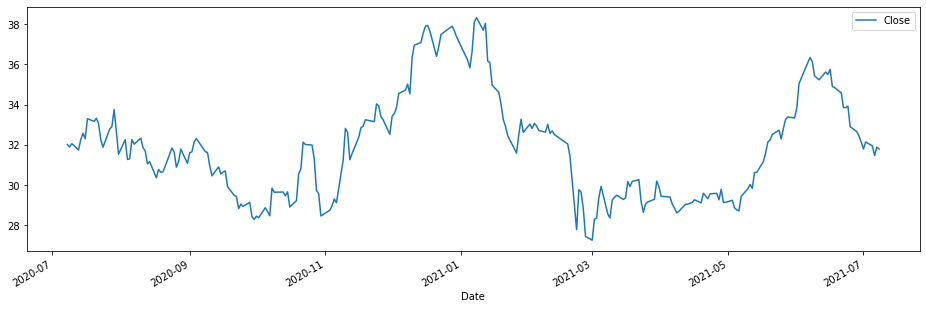

In [3]:
df.plot(figsize=(16,5))

In [4]:
ma = df.rolling(window=20).mean()
std = df.rolling(window=20).std()

In [5]:
upper_band = ma + 2 * std
lower_band = ma - 2 * std
upper_band = upper_band.rename(columns = {'Close':'upper'})
lower_band = lower_band.rename(columns = {'Close':'lower'})

In [6]:
bollinger_bands = df.join(upper_band).join(lower_band)
bollinger_bands.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

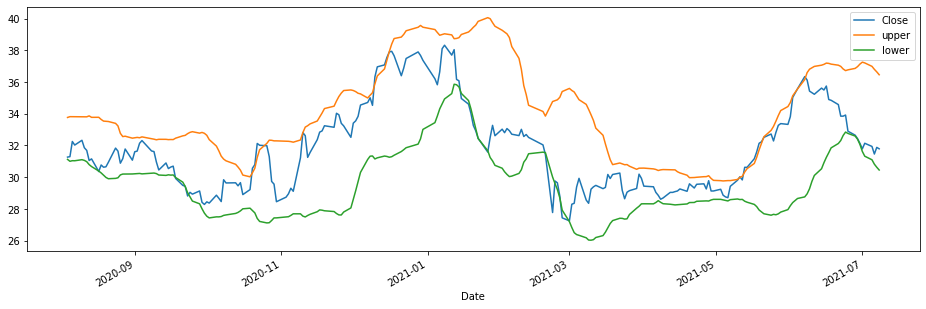

In [7]:
bollinger_bands.plot(figsize=(16,5))

In [8]:
buy = bollinger_bands[bollinger_bands['Close'] <= bollinger_bands['lower']]
sell = bollinger_bands[bollinger_bands['Close'] >= bollinger_bands['upper']]

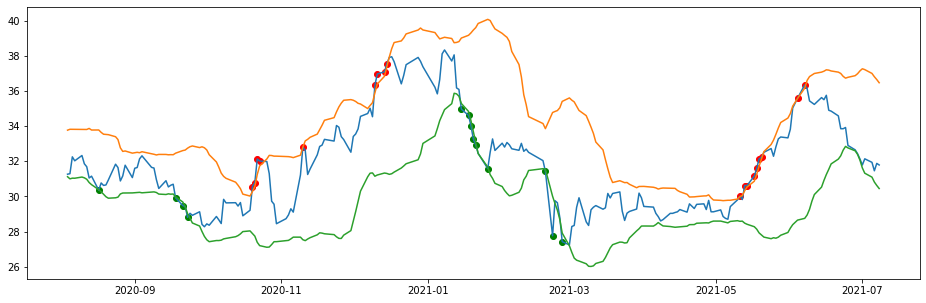

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(bollinger_bands)
plt.scatter(sell.index, sell['Close'], color='red')
plt.scatter(buy.index, buy['Close'], color='green')